# Project 2 - Wholesale Customer DataSet - Classification and Feature Scaling 

The Dataset contains monetary spending on diverse product catergories of the clients who purchase their goods from a wholesale distributor . 
Intially we perform Exploratary Data Analysis on the Dataset 

In [119]:
#  The imports needed for this notebook can be found here 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [120]:
# Here we read the data from the customer dataset
wholesale=pd.read_csv('Wholesale customers data.csv')

In [121]:
wholesale.head

<bound method NDFrame.head of      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4  

First we need to try and understand the dataset with which we are working, therefore we  try to understand the shape of the dataset and the data types of the features found in the dataset. Next we need to check if there are any outliers or missing data values in the dataset. 

# Exploratory Data Analysis 

In [122]:
wholesale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [123]:
wholesale.shape

(440, 8)

In [124]:
wholesale.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Next we try and understand the stastical distribution of the wholesale customer database . We can use the .describe method to understand about the standard deviation and other quartile values.

In [125]:
wholesale.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


As the counts of all the features are same, we know that none of features have missing values in them. 


Now we can plot all the features of the dataset to understand the distribution of data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D7F235F880>,
      dtype=object)

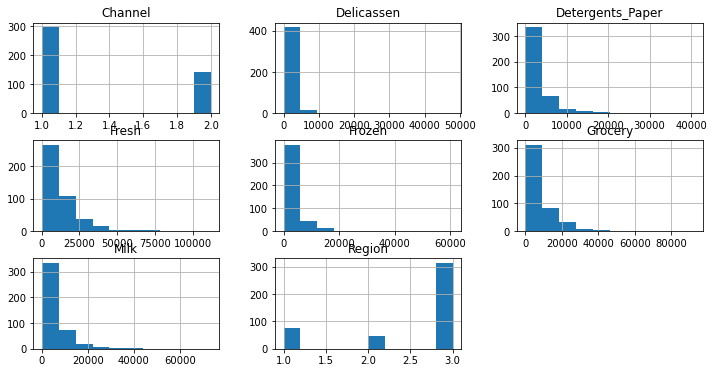

In [126]:
wholesale.hist(figsize=(12,6))

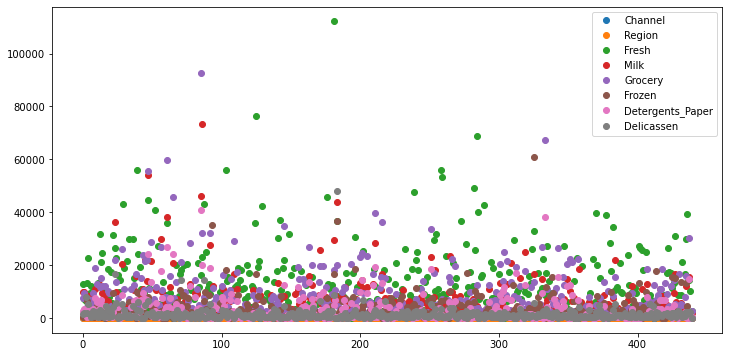

In [127]:
%matplotlib inline
wholesale.plot(figsize=(12,6), style='o');

The scatter plot above shows the distribution of all the features of the dataset. This plot also can be used to get an understanding of the distribution of data 

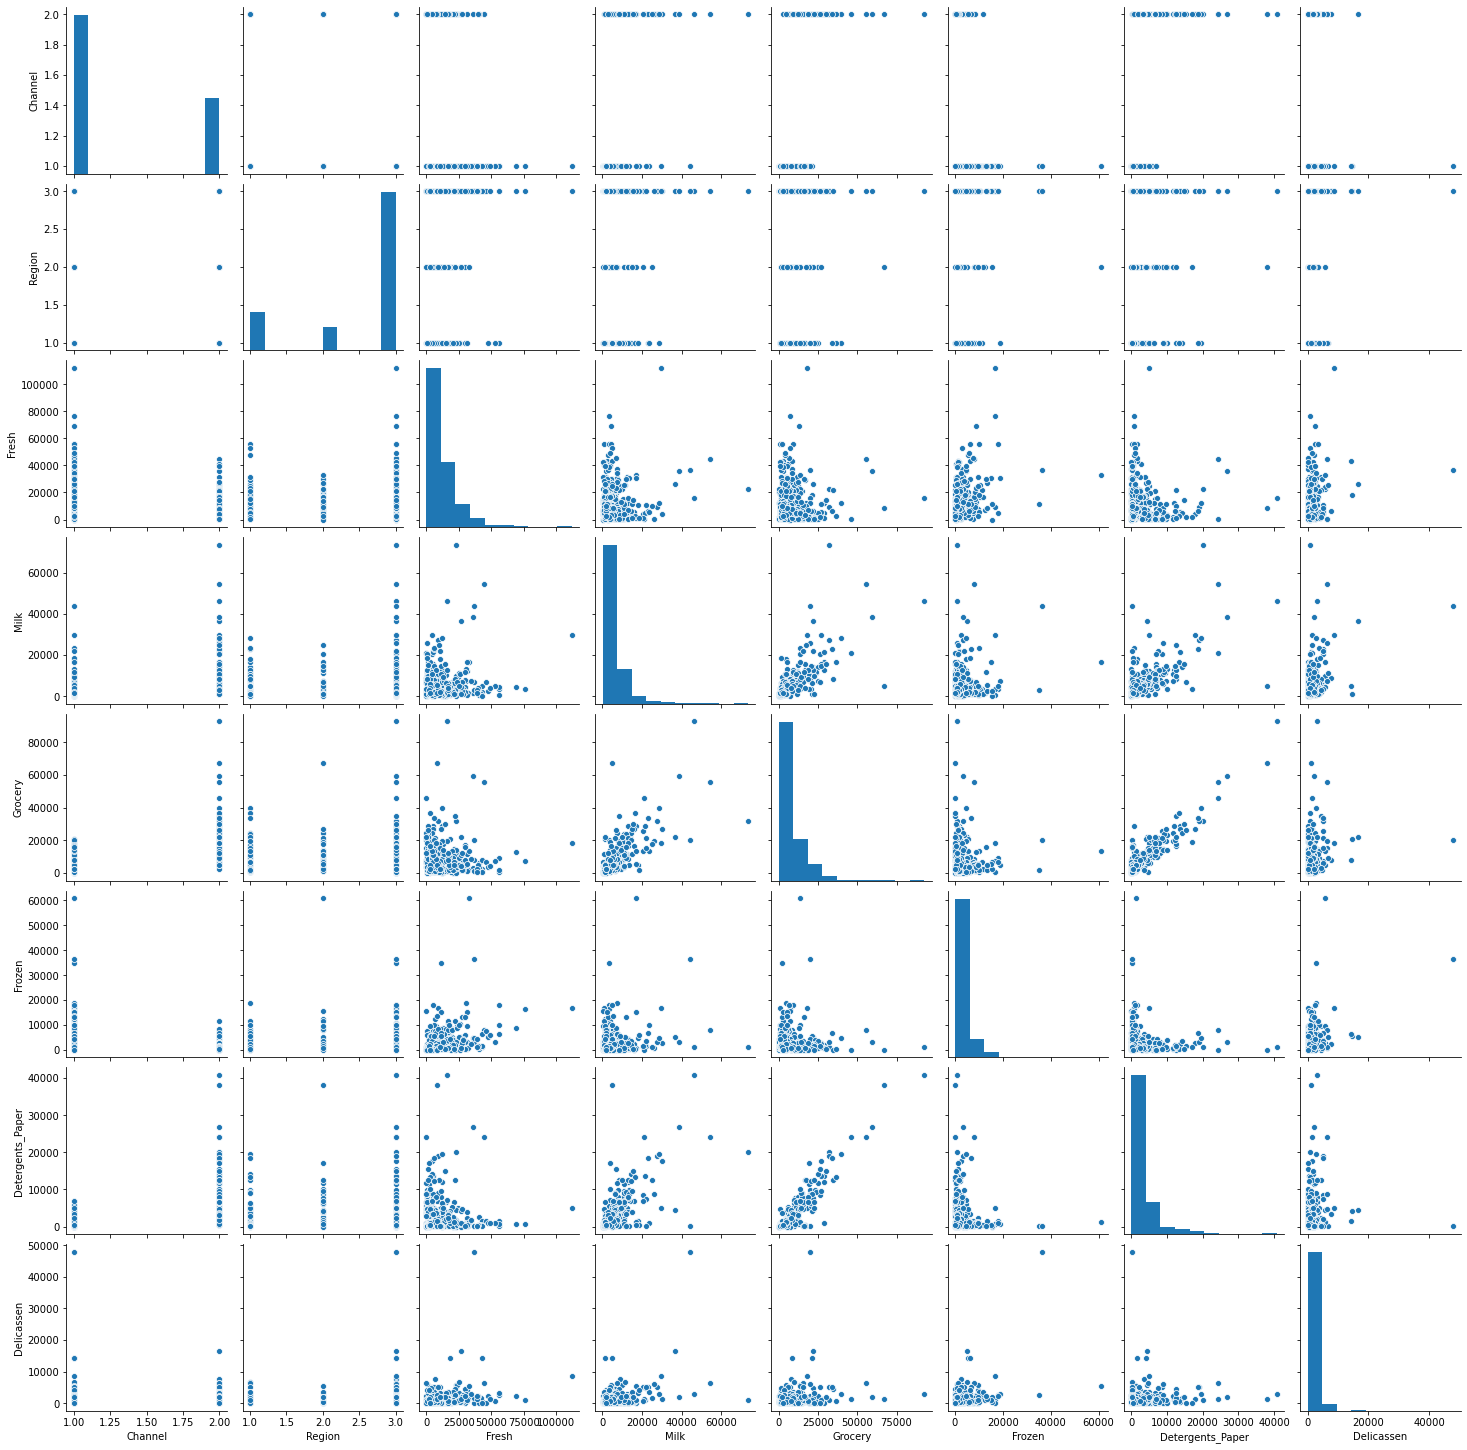

In [128]:
sns.pairplot(wholesale)

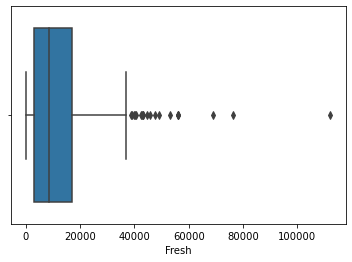

In [129]:
sns.boxplot(x=wholesale['Fresh'])

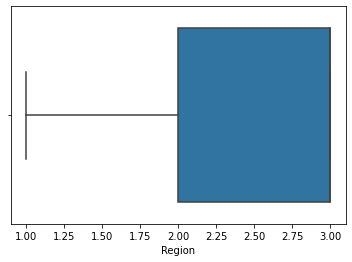

In [130]:
sns.boxplot(x=wholesale['Region'])

Region seems to be a Catergorical Feature because there are seems to be 

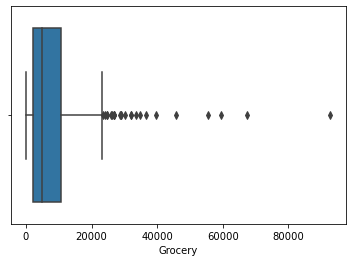

In [131]:
sns.boxplot(x=wholesale['Grocery'])

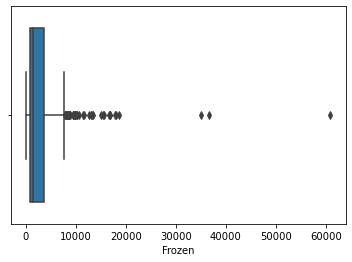

In [132]:
sns.boxplot(x=wholesale['Frozen'])

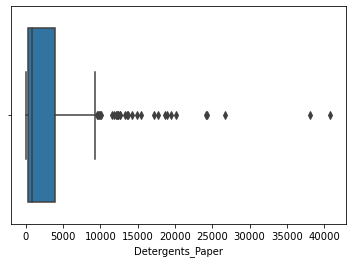

In [133]:
sns.boxplot(x=wholesale['Detergents_Paper'])

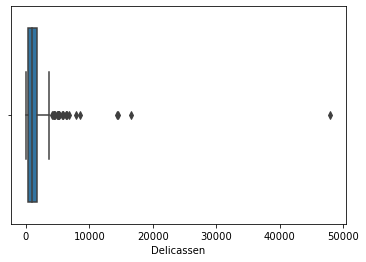

In [134]:
sns.boxplot(x=wholesale['Delicassen'])

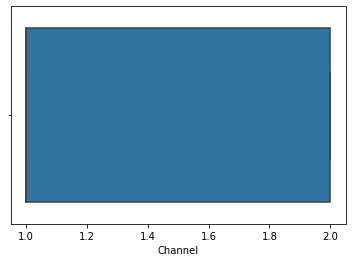

In [135]:
sns.boxplot(x=wholesale['Channel'])

After looking at the boxplots we can clearly that the Channel and Region features are categorical features, therefore we can spilt these 2 features. And we can peform EDA seperately on these 2 features. 

In [136]:
wholesale.groupby('Channel').mean()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,,
1,2.510067,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376
2,2.612676,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620


In [137]:
wholesale.groupby('Region').mean()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Region,,,,,,,
1,1.233766,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104
2,1.404255,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128
3,1.332278,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266


Next we try to understand the corelation between ,all the features of the dataset.Next we use a heatmap to plot the corelation matrix, where we can better understand the dataset around it. 

In [138]:
wholesale.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


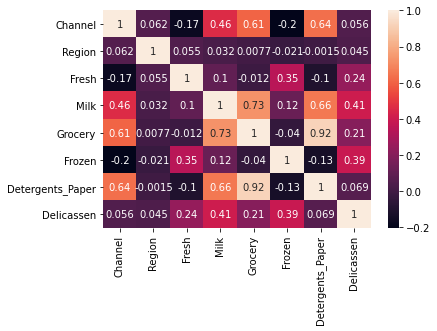

In [139]:

sns.heatmap(wholesale.corr(), 
        xticklabels=wholesale.columns,
        yticklabels=wholesale.columns,
        annot=True    )

In the corelation matrix we can see that the Grocery and Detergents Paper are somewhat strongly correlated to the Channel feature. Other features doesnt seem to have very high correaltion values with the Channel of the grocery store.

In [190]:
features = wholesale.drop(['Channel'], axis=1)
labels = pd.DataFrame(wholesale['Channel'])

Now we seperate the channel from the dataset,and then we convert the channel into a binary variable so that it would be easier to classified.

In [141]:
labels.replace([1, 2,], 
                     [0, 1],inplace=True)

In [142]:
labels

,Channel
0,1
1,1
2,1
3,0
4,1
...,...
435,0
436,0
437,1
438,0


In [143]:
pd.DataFrame(features).describe().head(3)

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937


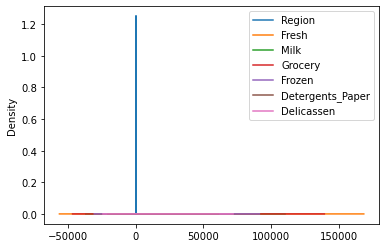

In [144]:
pd.DataFrame(features).plot(kind='kde');

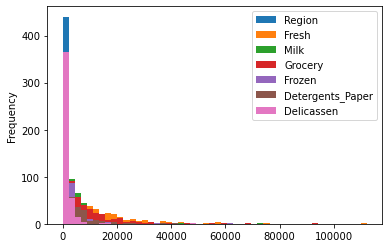

In [145]:
pd.DataFrame(features).plot(kind='hist',bins = 50);

In [146]:
from sklearn.preprocessing import StandardScaler


X_scaled_standard = StandardScaler().fit_transform(features)

In [147]:
pd.DataFrame(X_scaled_standard).describe().head(3)

,0,1,2,3,4,5,6
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-5.737834e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00


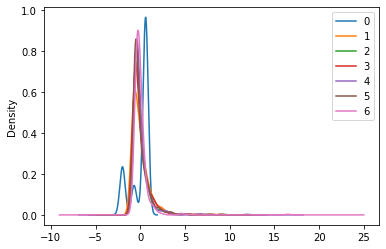

In [148]:
pd.DataFrame(X_scaled_standard).plot(kind='kde')

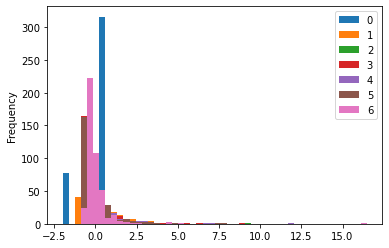

In [149]:
pd.DataFrame(X_scaled_standard).plot(kind='hist',bins = 50);

In [150]:
from sklearn.preprocessing import MinMaxScaler
# transform data
X_scaled_MinMax = MinMaxScaler().fit_transform(features)

In [151]:
pd.DataFrame(X_scaled_MinMax).describe().head(3)

,0,1,2,3,4,5,6
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.00000,440.000000
mean,0.771591,0.106977,0.078173,0.085671,0.050078,0.07051,0.031745
std,0.387136,0.112774,0.100491,0.102430,0.079789,0.11679,0.058826


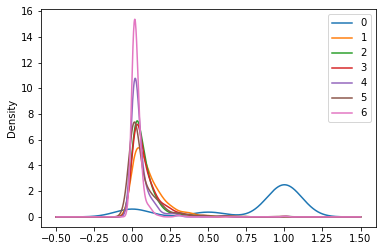

In [152]:
pd.DataFrame(X_scaled_MinMax).plot(kind='kde')

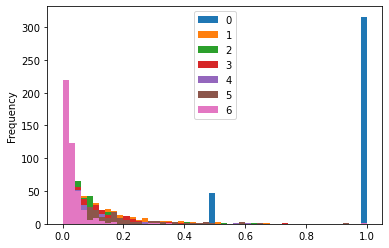

In [153]:
pd.DataFrame(X_scaled_MinMax).plot(kind='hist',bins=50)

When Looking at the plots above we can clearly see that the Standard Scaler has done a better job at normalizing the data and it has distributed the data evenly as well as in the MinMaxScaler we can see some skewness, with a few features and also the density of the features are not evenly distributed in the kde diagram. 

# Recursive Feature Elimination

Lets try and select which Classifer Algorithim we should use on the dataset to before we perform RFECV. We try canto fit scaled dataset with 4 types of Classifying Algorithim and compare the performance metrics. Before we perform try to fit it into the models we will spilt the data into a training and testing data set. 

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_standard, labels, test_size=0.2, random_state=12)

In [155]:

# Step 4 - Compare Classification Algorithms
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


classification_models = []
classification_models.append(('Logistic Regression', LogisticRegression(solver="liblinear")))
classification_models.append(('K Nearest Neighbor', KNeighborsClassifier(n_neighbors=5, metric="minkowski",p=2)))
classification_models.append(('Naive Bayes', GaussianNB()))
classification_models.append(('Decision Tree', DecisionTreeClassifier(criterion = "entropy")))
classification_models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion="entropy")))

for name, model in classification_models:
  kfold = KFold(n_splits=10)
  result = cross_val_score(model, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')
  print("%s: Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (name, result.mean()*100, result.std()*100))

Logistic Regression: Mean Accuracy = 90.63% - SD Accuracy = 3.62%
K Nearest Neighbor: Mean Accuracy = 88.38% - SD Accuracy = 6.59%
Naive Bayes: Mean Accuracy = 89.21% - SD Accuracy = 4.89%
Decision Tree: Mean Accuracy = 88.36% - SD Accuracy = 4.65%
Random Forest: Mean Accuracy = 90.35% - SD Accuracy = 4.06%


From the running the making a simple classifying model we can see that the Random Forest Classifer performs the best, therefore we can use it to perform RFECV to find the optimal number of features to be used.

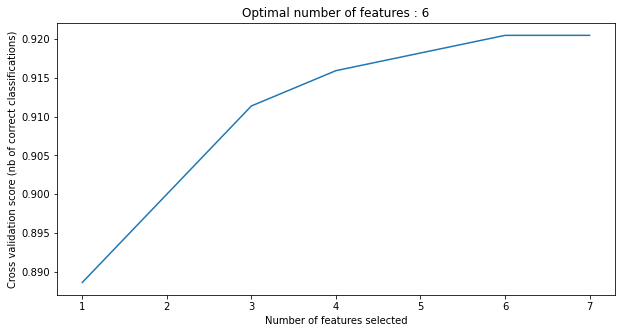

In [179]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV


rf = RandomForestClassifier(max_depth=7, random_state=12)
rfecv = RFECV(estimator=rf)
rfecv.fit(X_scaled_standard, labels['Channel'])

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.title("Optimal number of features : %d" % rfecv.n_features_)
plt.show()

We can see that the optimal number of features which needs to be used in a classification problem is 6 and now we will try to rank which of the features are optimal to be used .

# Feature Ranking 

Next we perform Feature Ranking using the rfcev 

In [157]:
rfecv.support_

array([False,  True,  True,  True,  True,  True,  True])

In [158]:
rf_df = pd.DataFrame(rfecv.ranking_,index= features.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)


In [159]:
rf_df

,Rank
Fresh,1
Milk,1
Grocery,1
Frozen,1
Detergents_Paper,1
Delicassen,1
Region,2


We can see the features ranked, we can see that the feature Region is less ranked when compared with the other features using RFECV. This maybe to due to the fact that region has very little correlation with the other features found in the dataset. 

# Clustering  

Next we perform the clustering on the wholesale dataset, we try to use the Elbow to identify which number of clusters would be ideal to be used to whole sale customer dataset. 

In [160]:
import sklearn.metrics as sm
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [161]:
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_scaled_standard)
    Sum_of_squared_distances.append(km.inertia_)

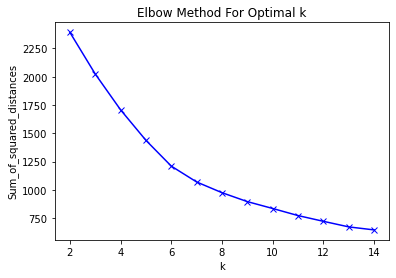

In [162]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From the plot above we can clearly see that the ideal number of clusters is 6 for this dataset as this where the optimal curve tends to change the steepness. We will now create a kmeans clustering model with 6 clusters to segreate the dataset.

In [163]:
clustering1 = KMeans(n_clusters=6, random_state=42)
Km = clustering1.fit(X_scaled_standard)


In [182]:
wholesale['cluster'] = clustering1.fit_predict(X_scaled_standard)
centroids = clustering1.cluster_centers_
centroids

array([[-1.57313634e+00, -1.48728488e-01, -2.96993143e-01,
        -2.97237152e-01, -4.08114953e-02, -3.19795213e-01,
        -1.29105275e-01],
       [ 2.93864819e-03,  3.88728973e-01,  3.94304862e+00,
         4.02164626e+00,  3.57841274e-02,  4.22611641e+00,
         9.41635735e-01],
       [ 5.90668285e-01, -2.57307726e-01, -3.34282600e-01,
        -3.98262385e-01, -2.27964915e-01, -3.60949562e-01,
        -1.62348695e-01],
       [ 3.67736354e-01,  1.68937915e+00, -1.03463499e-01,
        -2.37403471e-01,  1.17620939e+00, -3.91308235e-01,
         3.60034601e-01],
       [ 2.06261333e-01, -5.23033856e-01,  7.12771996e-01,
         1.03012525e+00, -3.56456625e-01,  1.07528923e+00,
        -3.94741740e-02],
       [ 5.90668285e-01,  1.96681731e+00,  5.17550306e+00,
         1.28721685e+00,  6.90059988e+00, -5.54861977e-01,
         1.64784475e+01]])

In [183]:
print(classification_report(labels,clustering1.labels_ ))

              precision    recall  f1-score   support

           0       0.84      0.28      0.41       298
           1       1.00      0.08      0.14       142
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.21       440
   macro avg       0.31      0.06      0.09       440
weighted avg       0.89      0.21      0.33       440



C:\Users\ruwin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The classification report above gives us a good idea on the performance of the cluserting performed by the Kmeans Algorithim and it has good precision for the first 2 clusters 

# PCA - Principal Component Analysis 

Next we try to perform PCA on the wholesale dataset to identify which are the most principal component analysis. Lets try to perform PCA for the first 2 features and then for the first 4 component

In [172]:

from sklearn import decomposition
from sklearn.decomposition import PCA


pca2 = PCA(n_components=2)
wholesale_pca2 = pca2.fit_transform(X_scaled_standard)


pca4 = PCA(n_components=4)
wholesale_pca4 = pca4.fit_transform(X_scaled_standard)

In [194]:
pca2.explained_variance_ratio_

array([0.37795265, 0.24356898])

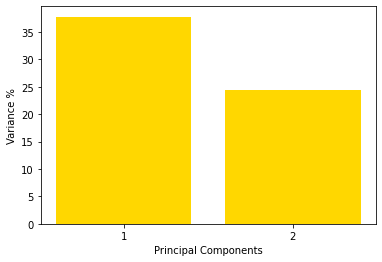

In [195]:
PC = range(1, pca2.n_components_+1)
plt.bar(PC, pca2.explained_variance_ratio_*100, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)


# Putting components in a dataframe for later
PCA_components2 = pd.DataFrame(wholesale_pca2)

We can say that the 1st PC holds 37% of the information of the dataset and that the 2nd PC holds upto 24% percent of the information of the dataset. Now we will look at next 2 Prinipal Components of the Dataset.

In [198]:
pca4.explained_variance_ratio_

array([0.37795265, 0.24356898, 0.14375576, 0.10543601])

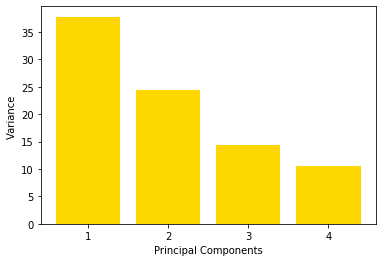

In [197]:
PC = range(1, pca4.n_components_+1)
plt.bar(PC, pca4.explained_variance_ratio_*100, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance ')
plt.xticks(PC)

# Putting components in a dataframe for later
PCA_components4 = pd.DataFrame(wholesale_pca4)

The next 2 components, contains around 14% percent of the dataset is for the 3rd component , while the 4th component has only 12% percent of the dataset.
Next we can look at the Clusters we are made both with 2 pcs and 4 pcs.

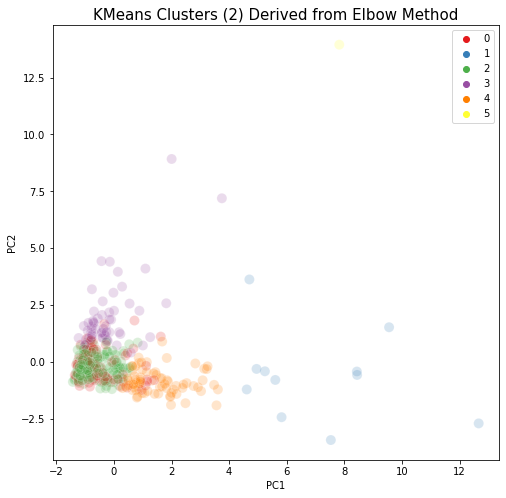

In [213]:

plt.figure(figsize = (8,8))
sns.scatterplot(wholesale_pca2[:,0], wholesale_pca2[:,1], 
                hue=Km.labels_, 
                palette='Set1',
                s=100, alpha=0.2).set_title('KMeans Clusters (2) Derived from Elbow Method', fontsize=15)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

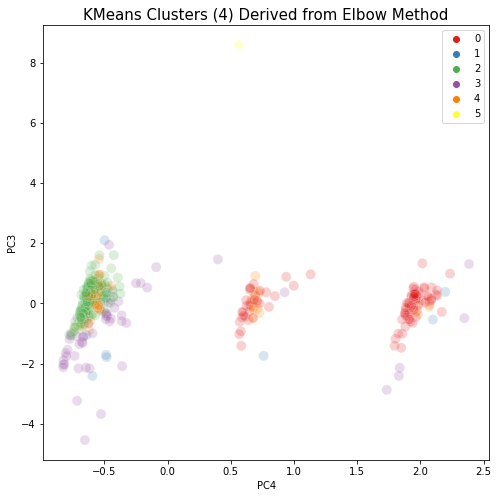

In [212]:
plt.figure(figsize = (8,8))
sns.scatterplot(wholesale_pca4[:,2], wholesale_pca4[:,3], 
                hue=Km.labels_, 
                palette='Set1',
                s=100, alpha=0.2).set_title('KMeans Clusters (4) Derived from Elbow Method', fontsize=15)
plt.legend()
plt.ylabel('PC3')
plt.xlabel('PC4')
plt.show()

# XGBoostClassifer 

Now we perform the Classification on the Dataset using the XBoostClassifer algorithim. Before are able to perform the classified we can spilt the dataset into train and test sets so that it would be easier to be evaluated.

In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_standard, labels, test_size=0.8, random_state=42)

In [200]:
import xgboost
import sklearn.model_selection 
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


# declare performance metrics

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}
          
# instantiate the classifier 
model = XGBClassifier(eval_metric='mlogloss')


kfold = KFold(n_splits=5, random_state=7)
results = cross_validate(model, X_train, y_train, cv=kfold,scoring=scoring)

C:\Users\ruwin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\ruwin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ruwin\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [218]:
print("Accuracy: %.2f%% " % (results['test_accuracy'].mean()*100))
print("Precision: %.2f " % (results['test_precision'].mean()))
print("Recall: %.2f " % (results['test_recall'].mean()))
print("F1 Score: %.2f " % (results['test_f1_score'].mean()))

Accuracy: 91.96% 
Precision: 0.86 
Recall: 0.89 
F1 Score: 0.87 


After we have performed classfiying using the XGBoost algorithim, we get an  accuaray of around 91% and very high precision values . We can say that the XGBoost classifying algorithim is ideal to classify which customer will buy from a certain channel. 